In [1]:
### Zero to Hero in Natural Language Processing (NLP): A Beginner’s Template for Text Classification

# Step 1: Loading and Understanding the Dataset

In [12]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
url = "https://raw.githubusercontent.com/fenago/datasets/refs/heads/main/TheSocialDilemma.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

# Displaying the first few rows of the dataset
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch âThe Social Dilemmaâ on Netflix!\...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. Iâm ...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20068 entries, 0 to 20067
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         20067 non-null  object
 1   user_location     15860 non-null  object
 2   user_description  18685 non-null  object
 3   user_created      20068 non-null  object
 4   user_followers    20068 non-null  int64 
 5   user_friends      20068 non-null  int64 
 6   user_favourites   20068 non-null  int64 
 7   user_verified     20068 non-null  bool  
 8   date              20068 non-null  object
 9   text              20068 non-null  object
 10  hashtags          15771 non-null  object
 11  source            20068 non-null  object
 12  is_retweet        20068 non-null  bool  
 13  Sentiment         20068 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.9+ MB


In [14]:
df.isnull().sum()

user_name              1
user_location       4208
user_description    1383
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            4297
source                 0
is_retweet             0
Sentiment              0
dtype: int64

In [16]:
df.dropna()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. Iâm ...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive
7,Laura,Kent,"Mother, optimist, feminist, pacifist, retired ...",2009-02-05 20:39:55,696,444,10551,False,2020-09-16 20:48:55,Erm #TheSocialDilemma makes me want to go off ...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
8,Eugeneð«,South Africa,Africanð | Musicð¶ | Lakersð|Mancheste...,2012-10-25 09:16:10,2180,1570,18692,False,2020-09-16 20:48:47,"#TheSocialDilemma is not a documentary, it's h...",['TheSocialDilemma'],Twitter for Android,False,Positive
9,RYAN,"Dallas, TX",IG:@RYANWHITEC ð»Digital Content Creator. 97...,2010-04-23 01:34:20,5011,2422,619,False,2020-09-16 20:47:18,Okay iâm watching #TheSocialDilemma now.,['TheSocialDilemma'],Twitter for iPhone,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20056,Jonathan Hood,Warm and Sunny,My ð¤ is ð¥ on @espn1000 on @kapjhood+ @es...,2009-04-13 23:18:19,22006,997,20911,False,2020-10-09 01:10:09,This is what #TheSocialDilemma is all about f...,['TheSocialDilemma'],Twitter for iPhone,False,Neutral
20057,Germar T. Gardner,"The Port, CT",A Storyteller!,2014-03-20 14:50:51,751,220,5632,False,2020-10-09 01:05:23,I mean...I already knew b4 #TheSocialDilemma t...,['TheSocialDilemma'],Twitter for Android,False,Neutral
20059,Carolina Blue,"North Carolina, USA",#UNCAlum #TarHeels #SportsFanatic #Hornets #C...,2009-01-16 20:39:48,1300,4973,117862,False,2020-10-09 01:02:08,"Every member of Congress, their staff and ever...",['TheSocialDilemma'],Twitter Web App,False,Positive
20062,Alfredo On,Singapore,BIG HORROR MOVIE / TV SERIES FAN ððªðªâ...,2016-04-05 10:17:50,71,510,4812,False,2020-10-09 00:33:04,Watching #TheSocialDilemma,['TheSocialDilemma'],Twitter for iPhone,False,Neutral


In [17]:
# Handling missing values and converting labels to binary format
df.dropna(subset=['text'], inplace=True)
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})

Step 2: Data Preprocessing — The Key to High-Performance Models

In [18]:
import re

# Cleaning the text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    return text

# Applying the cleaning function to the dataset
df['text'] = df['text'].apply(clean_text)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,musicmadmarc socialdilemma netflix facebook im...,NaN,Twitter Web App,False,0
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,musicmadmarc socialdilemma netflix facebook ha...,NaN,Twitter Web App,False,0
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,go watch the social dilemma on netflix\n\nits ...,NaN,Twitter for iPhone,False,1
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,i watched thesocialdilemma last night im scare...,['TheSocialDilemma'],Twitter for iPhone,False,-1
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,the problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,1


Step 3: Text Vectorization with TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

# Transforming the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])
y = df['Sentiment']

Step 4: Splitting the Data for Training and Testing

In [20]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

### Step 5: Building and Evaluating Classification Models

In [21]:
# 5.1 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.53      0.66       733
           0       0.77      0.92      0.84      1345
           1       0.86      0.88      0.87      1936

    accuracy                           0.83      4014
   macro avg       0.84      0.78      0.79      4014
weighted avg       0.84      0.83      0.82      4014



In [22]:
# 5.2 Support Vector Machine (SVM)
from sklearn.svm import SVC

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.63      0.73       733
           0       0.78      0.96      0.86      1345
           1       0.91      0.86      0.89      1936

    accuracy                           0.85      4014
   macro avg       0.86      0.82      0.83      4014
weighted avg       0.86      0.85      0.85      4014



In [23]:
### 5.3 XGBoost
from xgboost import XGBClassifier

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [-1  0  1]

### Step 6: Confusion Matrix — Understanding the Results

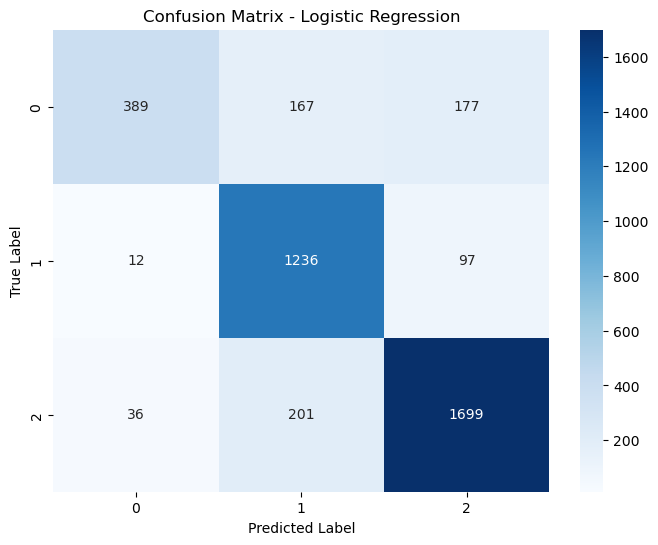

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generating and plotting the confusion matrix for the Logistic Regression model
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()